# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | hailey
Processing Record 7 of Set 1 | haiku-pauwela
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | rio grande
Processing Record 10 of Set 1 | rio san juan
Processing Record 11 of Set 1 | tymovskoye
Processing Record 12 of Set 1 | kita
Processing Record 13 of Set 1 | ciudad lazaro cardenas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | mangrol
Processing Record 16 of Set 1 | island harbour
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | phang nga
Processing Record 19 of Set 1 | farasan
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | porto novo
Processing Record 22 of Set

Processing Record 37 of Set 4 | carutapera
Processing Record 38 of Set 4 | st. john's
Processing Record 39 of Set 4 | caluula
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | chos malal
Processing Record 42 of Set 4 | cadale
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | tamanrasset
Processing Record 45 of Set 4 | sainte-rose
Processing Record 46 of Set 4 | stolin
Processing Record 47 of Set 4 | bhadaur
Processing Record 48 of Set 4 | statesboro
Processing Record 49 of Set 4 | tsengel
Processing Record 0 of Set 5 | deir ez-zor
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | aswan
Processing Record 3 of Set 5 | magdagachi
Processing Record 4 of Set 5 | les cayes
Processing Record 5 of Set 5 | palikir - national government center
Processing Record 6 of Set 5 | gemena
Processing Record 7 of Set 5 | markovo
Processing Record 8 of Set 5 | kamaishi
Processing Record 9 of Set 5 | san miguel
Processing Record 10 of Set 5 | 

Processing Record 31 of Set 8 | ormara
Processing Record 32 of Set 8 | okha
Processing Record 33 of Set 8 | shubarshi
Processing Record 34 of Set 8 | san fernando del valle de catamarca
Processing Record 35 of Set 8 | coahuayana de hidalgo
Processing Record 36 of Set 8 | ustyuzhna
Processing Record 37 of Set 8 | tabou
Processing Record 38 of Set 8 | ar ruways
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | mcrae
Processing Record 42 of Set 8 | lamu
Processing Record 43 of Set 8 | fisterra
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | golfito
Processing Record 46 of Set 8 | gorontalo
Processing Record 47 of Set 8 | revda
Processing Record 48 of Set 8 | celestun
Processing Record 49 of Set 8 | villa del totoral
Processing Record 0 of Set 9 | umrala
Processing Record 1 of Set 9 | malvik
Processing Record 2 of Set 9 | altai
Processing Record 3 of Set 9 | griffith
Processing Record 4 of Set 9 | fale ol

Processing Record 20 of Set 12 | arthur's town
City not found. Skipping...
Processing Record 21 of Set 12 | mizdah
Processing Record 22 of Set 12 | bengkulu
Processing Record 23 of Set 12 | chongjin
Processing Record 24 of Set 12 | negara
Processing Record 25 of Set 12 | tagab
Processing Record 26 of Set 12 | dashiqiao
Processing Record 27 of Set 12 | kangding
Processing Record 28 of Set 12 | saint-joseph
Processing Record 29 of Set 12 | luanshya
Processing Record 30 of Set 12 | san sebastian de la gomera
Processing Record 31 of Set 12 | iquitos
Processing Record 32 of Set 12 | oyama
Processing Record 33 of Set 12 | yemetsk
Processing Record 34 of Set 12 | ranohira
City not found. Skipping...
Processing Record 35 of Set 12 | namsos
Processing Record 36 of Set 12 | seka
Processing Record 37 of Set 12 | naama
Processing Record 38 of Set 12 | barcelos
Processing Record 39 of Set 12 | siwa oasis
Processing Record 40 of Set 12 | zheleznodorozhnyy
Processing Record 41 of Set 12 | bontang
Pro

In [24]:
# Convert the cities weather data into a Pandas DataFra
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,287.22,61,93,0.45,AU,1698612409
1,albany,42.6001,-73.9662,280.11,92,100,1.61,US,1698612208
2,west island,-12.1568,96.8225,299.14,83,100,6.17,CC,1698612417
3,grytviken,-54.2811,-36.5092,277.93,94,100,2.83,GS,1698612408
4,port-aux-francais,-49.3500,70.2167,274.74,81,100,11.91,TF,1698612409


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,287.22,61,93,0.45,AU,1698612506
1,salalah,17.0151,54.0924,299.20,83,0,2.06,OM,1698612214
2,dawson creek,55.7666,-120.2362,270.95,64,20,1.03,CA,1698612507
3,kissidougou,9.1848,-10.0999,296.19,76,14,1.14,GN,1698612507
4,college,64.8569,-147.8028,275.26,72,75,2.06,US,1698612507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

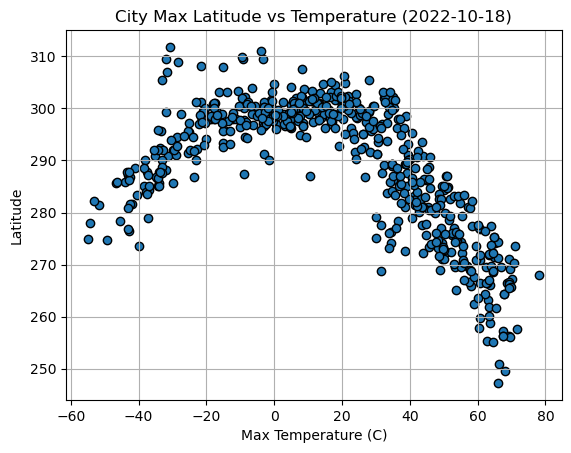

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Max Temperature (C)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

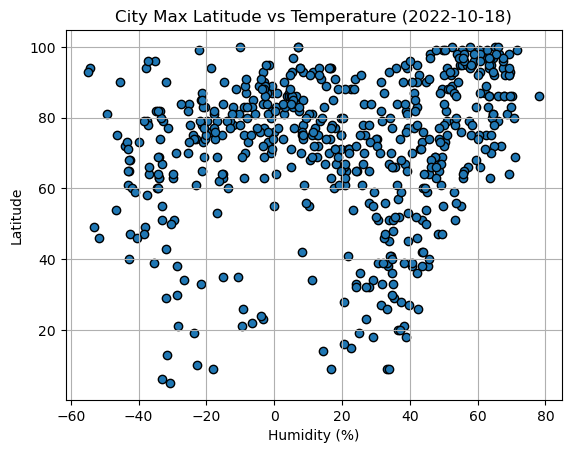

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

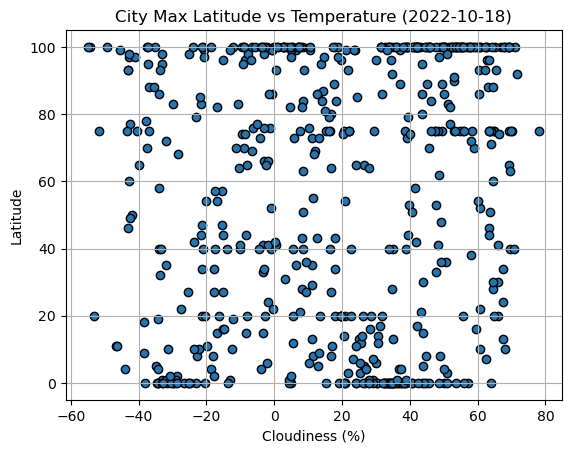

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

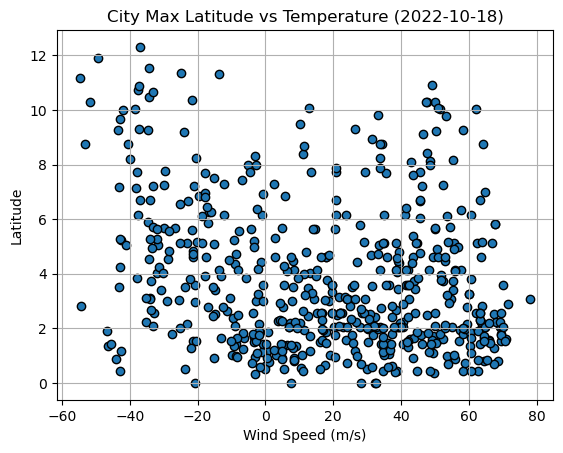

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# create fxn:
def create_linear_regression_plot(city_data_df, y_variable, hemisphere):
    
    # create scatter plot
    plt.scatter(city_data_df["Lat"], city_data_df[y_variable], alpha=0.5, edgecolors="black")
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df[y_variable])
    
    # calculate regression line
    regression_line = intercept + slope * city_data_df["Lat"]
    
    # add regression line to plot
    plt.plot(city_data_df["Lat"], regression_line)
    
    # customize/add labels and title
    plt.title(f"{y_variable} vs Latitude ({hemisphere} Hemisphere)")
    plt.xlabel("Latitude")
    plt.ylabel(y_variable)
    
    # display r_values
    # display(r_value)
    print(f"The r_value is {display(r_value)}")
    
    # show plot
    plt.show()
    

In [54]:
# Split data into northern and southern hemispheres: based on latitude
northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df[city_data_df["Lat"] < 0]

-0.8711071640648094

The r_value is None


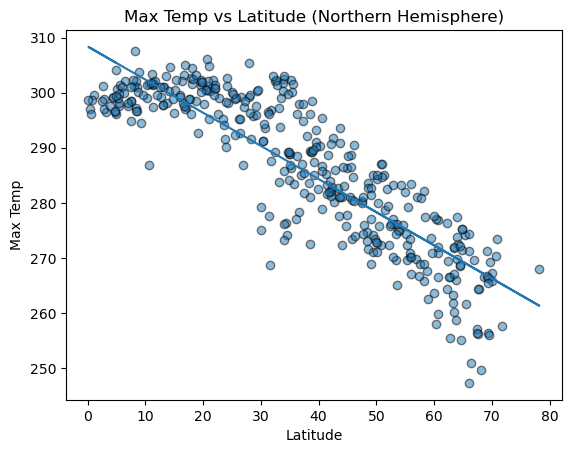

-0.8711071640648094

The r_value is None


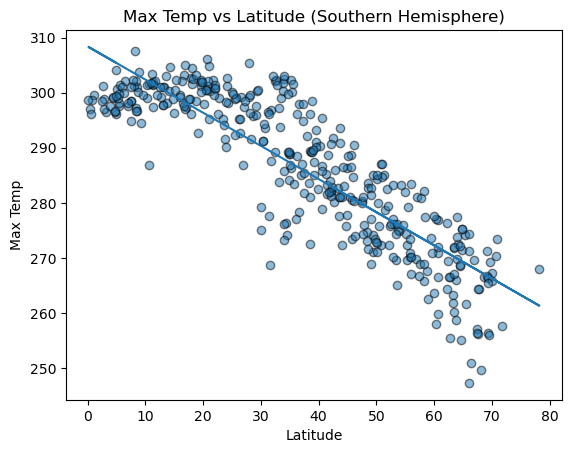

0.18532422193377235

The r_value is None


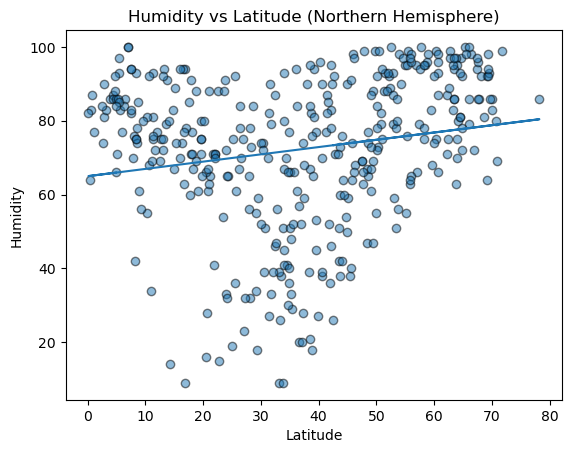

0.18532422193377235

The r_value is None


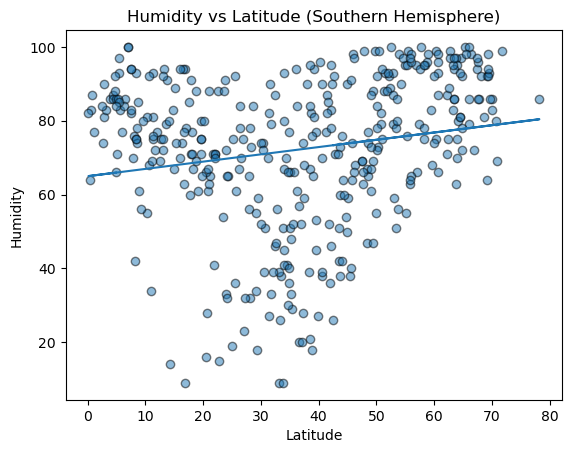

0.14818026902752487

The r_value is None


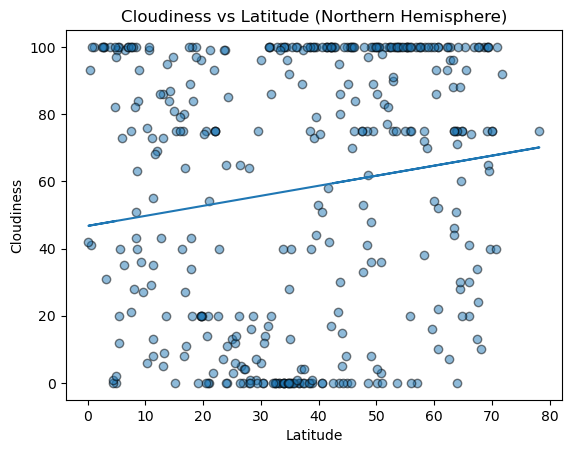

0.14818026902752487

The r_value is None


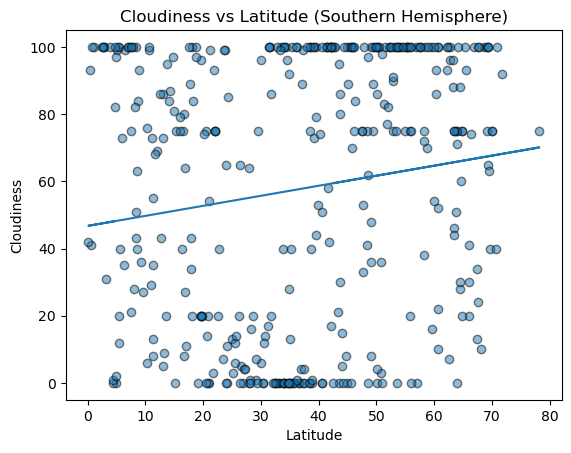

0.05349631736880276

The r_value is None


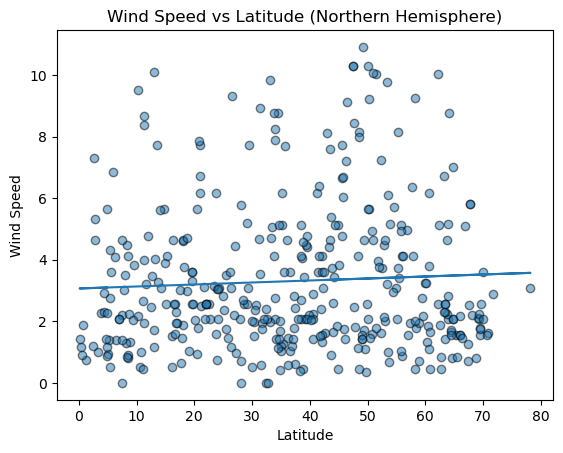

0.05349631736880276

The r_value is None


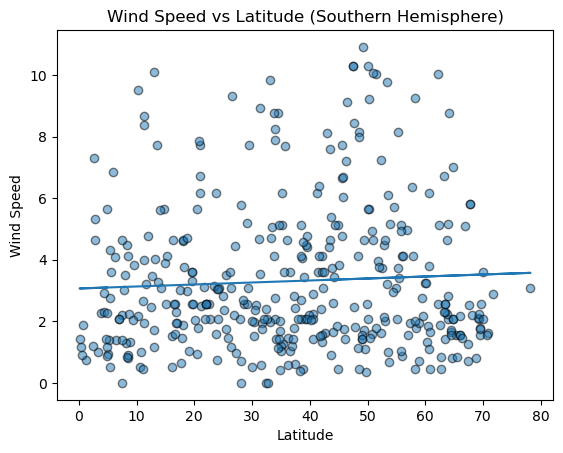

In [55]:
# y_variables
y_variables = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

for variable in y_variables:
    create_linear_regression_plot(northern_hemisphere, variable, "Northern")
    create_linear_regression_plot(northern_hemisphere, variable, "Southern")

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
# northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
# southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE